# **Decision Tree Classifier for Stroke Prediction** 🌳

This notebook walks through the steps of preprocessing the data, building a Decision Tree classifier, pruning the tree to reduce overfitting, and visualizing the model's performance.

## 1. **Loading the Dataset** 📂

We start by importing the necessary libraries and loading the dataset.

In [1]:
import pandas as pd
df = pd.read_csv("stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. **Splitting Inputs and Outputs** 🔄
We separate the features (inputs) and the target (output). The 'stroke' column is our target variable.

In [2]:
inputs = df.drop('stroke',axis='columns')
output = df['stroke']

## 3. **Encoding Categorical Variables** 🔢

We encode categorical variables such as gender, marital status, and work type into numerical values using `LabelEncoder`.

In [3]:
from sklearn.preprocessing import LabelEncoder
x  = LabelEncoder()
inputs['encodeGender']               = x.fit_transform(inputs['gender'])
inputs['encodeEver_married']         = x.fit_transform(inputs['ever_married'])
inputs['encodeWork_type']            = x.fit_transform(inputs['work_type'])
inputs['encodeResidence_type']       = x.fit_transform(inputs['Residence_type'])
inputs['encodeSmoking_status']       = x.fit_transform(inputs['smoking_status'])

# Preview the dataset after encoding
inputs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,encodeGender,encodeEver_married,encodeWork_type,encodeResidence_type,encodeSmoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,0,1,3,0,2


## 4. **Dropping Original Categorical Columns** 🚮
After encoding, we drop the original categorical columns from the dataset.

In [4]:
inputs_n = inputs.drop(['gender','work_type','ever_married','Residence_type','smoking_status'],axis='columns')
# Preview the cleaned dataset
inputs_n.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,encodeGender,encodeEver_married,encodeWork_type,encodeResidence_type,encodeSmoking_status
0,9046,67.0,0,1,228.69,36.6,1,1,2,1,1
1,51676,61.0,0,0,202.21,NaN,0,1,3,0,2
2,31112,80.0,0,1,105.92,32.5,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.4,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.0,0,1,3,0,2


## 5. **Selecting Relevant Features** 📊
We select the relevant features to be used for model training.

In [5]:
inputsT = inputs_n[['age','hypertension','heart_disease','avg_glucose_level','bmi','encodeGender','encodeEver_married','encodeWork_type','encodeResidence_type','encodeSmoking_status']]

## 6. **Train-Test Split** ✂️
We split the data into training and testing sets using an 80/20 split.

In [6]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train , X_test , y_train ,y_test = train_test_split(inputsT,output,test_size=0.2,random_state=42)

## **7. Building the Decision Tree Model** 🌳
We create and train a Decision Tree classifier on the training data.

In [7]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## **8. Making Predictions and Evaluating the Model** 📈
We use the trained model to make predictions on the test set and evaluate its accuracy.

In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Model accuracy: {model.score(X_test, y_test)}")

Model accuracy: 0.9090019569471625


## **9. Visualizing the Decision Tree** 🌲
We visualize the structure of the Decision Tree.

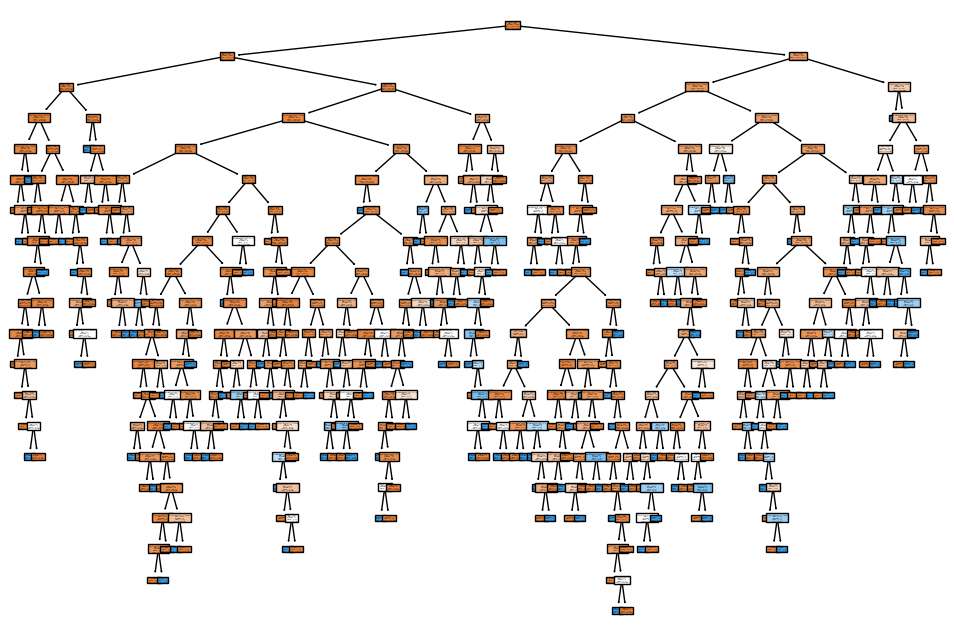

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['No Stroke', 'Stroke'])
plt.show()

## **10. Confusion Matrix for the Decision Tree** 📊
We generate and plot the confusion matrix to visualize the model's performance.

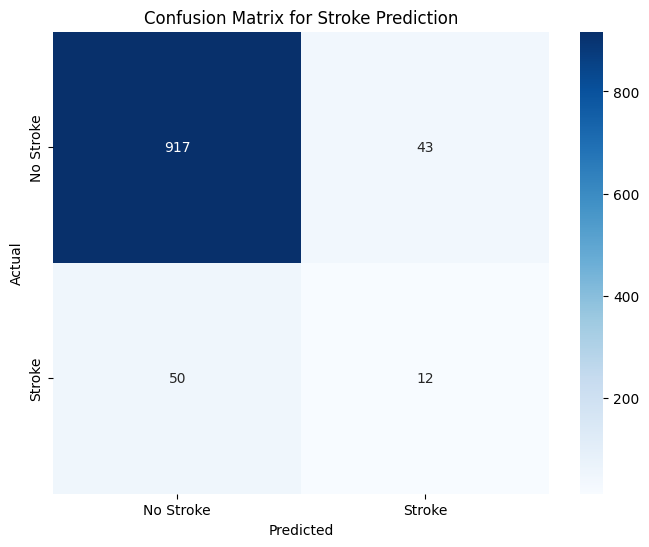

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction')
plt.show()

## **11. Pruning the Decision Tree** ✂️
We prune the Decision Tree to prevent overfitting by using cost complexity pruning.

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Compute the cost-complexity pruning path
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  

# Train multiple pruned trees using different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

## **12. Visualizing Accuracy vs Alpha** 📉
We plot the accuracy of the Decision Trees for different alpha values to identify the best alpha.

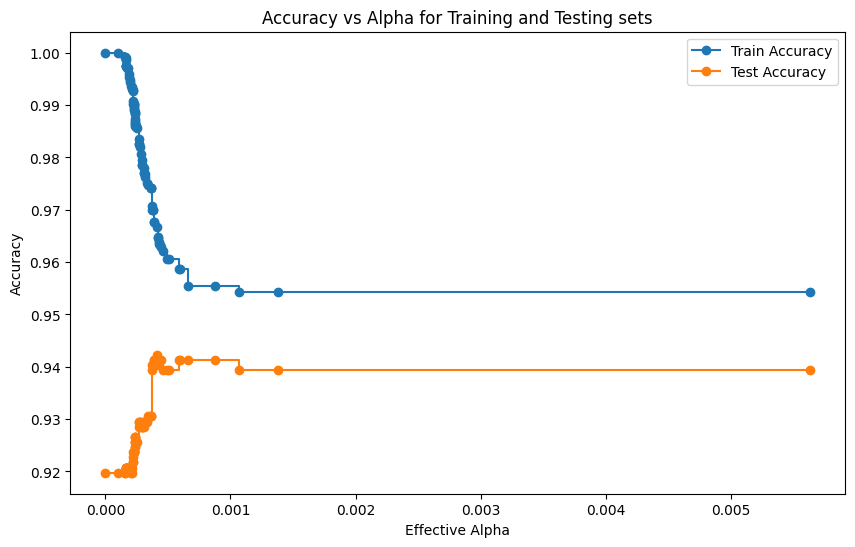

In [12]:
# Evaluate the trees
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot Accuracy vs Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs Alpha for Training and Testing sets")
plt.show()

In [16]:
# Select the best alpha and prune the tree
best_alpha = 0.001  # Replace with the actual best alpha from your analysis
pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

## **13. Pruned Tree Visualization** ✂️
We select the best alpha and prune the tree, then visualize the pruned tree structure.

In [13]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Evaluate unpruned tree on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Precision, Recall, F1-score for training set
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')

# Precision, Recall, F1-score for test set
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

print(f"Unpruned Tree Training Accuracy: {train_acc}")
print(f"Unpruned Tree Training Precision: {train_precision:.2f}")
print(f"Unpruned Tree Training Recall: {train_recall:.2f}")
print(f"Unpruned Tree Training F1-Score: {train_f1:.2f}")

print(f"Unpruned Tree Test Accuracy: {test_acc}")
print(f"Unpruned Tree Test Precision: {test_precision:.2f}")
print(f"Unpruned Tree Test Recall: {test_recall:.2f}")
print(f"Unpruned Tree Test F1-Score: {test_f1:.2f}")


Unpruned Tree Training Accuracy: 1.0
Unpruned Tree Training Precision: 1.00
Unpruned Tree Training Recall: 1.00
Unpruned Tree Training F1-Score: 1.00
Unpruned Tree Test Accuracy: 0.9090019569471625
Unpruned Tree Test Precision: 0.90
Unpruned Tree Test Recall: 0.91
Unpruned Tree Test F1-Score: 0.91


## 14. **Confusion Matrix for Pruned Tree** 📊
We generate the confusion matrix for the pruned Decision Tree to assess its performance.

In [17]:
# Evaluate pruned tree on the training and testing sets
y_train_pruned_pred = pruned_tree.predict(X_train)
y_test_pruned_pred = pruned_tree.predict(X_test)

# Accuracy
pruned_train_acc = accuracy_score(y_train, y_train_pruned_pred)
pruned_test_acc = accuracy_score(y_test, y_test_pruned_pred)

# Precision, Recall, F1-score for training set
pruned_train_precision, pruned_train_recall, pruned_train_f1, _ = precision_recall_fscore_support(y_train, y_train_pruned_pred, average='weighted')

# Precision, Recall, F1-score for test set
pruned_test_precision, pruned_test_recall, pruned_test_f1, _ = precision_recall_fscore_support(y_test, y_test_pruned_pred, average='weighted')

print(f"Pruned Tree Training Accuracy: {pruned_train_acc}")
print(f"Pruned Tree Training Precision: {pruned_train_precision:.2f}")
print(f"Pruned Tree Training Recall: {pruned_train_recall:.2f}")
print(f"Pruned Tree Training F1-Score: {pruned_train_f1:.2f}")

print(f"Pruned Tree Test Accuracy: {pruned_test_acc}")
print(f"Pruned Tree Test Precision: {pruned_test_precision:.2f}")
print(f"Pruned Tree Test Recall: {pruned_test_recall:.2f}")
print(f"Pruned Tree Test F1-Score: {pruned_test_f1:.2f}")


Pruned Tree Training Accuracy: 0.9554794520547946
Pruned Tree Training Precision: 0.96
Pruned Tree Training Recall: 0.96
Pruned Tree Training F1-Score: 0.93
Pruned Tree Test Accuracy: 0.9412915851272016
Pruned Tree Test Precision: 0.94
Pruned Tree Test Recall: 0.94
Pruned Tree Test F1-Score: 0.91


In [ ]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))